# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
# import numpy as np
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')
# X, y = mnist['data'], mnist['target']

import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [6]:
y[36000]

'9'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

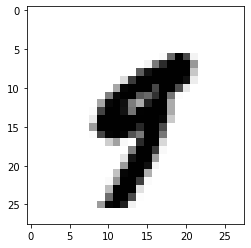

In [7]:
import matplotlib
import matplotlib.pyplot as plt
z = X[36000].reshape(28,28)
plt.imshow(z, cmap = matplotlib.cm.binary, interpolation ='nearest') 
plt.show()

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [8]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [9]:
X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000: ]
y_test = y[60000: ]
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_set, test_size=test_set, random_state=42)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [11]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [12]:
y_train_set_5 = np.where(y_train == '5', 1, 0)
y_train_set_5.shape

(60000,)

In [13]:
y_test_set_5 = np.where(y_test == '5', 1, 0)
y_test_set_5.shape

(10000,)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
model.fit(X_train, y_train_set_5)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Does the classifier predict correctly the 36000th digit we picked before?

In [15]:
model.predict(X_train[36000].reshape(1, -1))

array([0])

In [16]:
predict_5_classifier = model.predict(X_test)
predict_5_classifier

array([0, 0, 0, ..., 0, 1, 0])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [17]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [18]:
fit_never_5_classifier = never_5_clf.fit(y_test_set_5)
predict_never_5_classifier = never_5_clf.predict(y_test_set_5)
print(fit_never_5_classifier)
print(predict_never_5_classifier)

None
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [19]:
from sklearn.metrics import confusion_matrix
y_true = y_test_set_5
y_pred = predict_never_5_classifier
confusion_matrix_never_5_classifier = confusion_matrix(y_true, y_pred)
confusion_matrix_never_5_classifier

array([[9108,    0],
       [ 892,    0]])

In [20]:
from sklearn.metrics import precision_score
precision_never_5_classifier = precision_score(y_true, y_pred)
precision_never_5_classifier

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [21]:
from sklearn.metrics import recall_score
recall_never_5_classifier = recall_score(y_true, y_pred)
recall_never_5_classifier

0.0

In [22]:
from sklearn.metrics import f1_score
f1_score_never_5_classifier = f1_score(y_true, y_pred)
f1_score_never_5_classifier 

0.0

In [23]:
from sklearn.metrics import accuracy_score
accur_score = accuracy_score(y_true, y_pred)
accur_score

0.9108

In [24]:
y_true_5_classifier = y_test_set_5
y_pred_5_classifier = predict_5_classifier
confusion_matrix_5_classifier = confusion_matrix(y_true_5_classifier, y_pred_5_classifier)
confusion_matrix_5_classifier

array([[9034,   74],
       [ 147,  745]])

In [25]:
from sklearn.metrics import precision_score
precision_5_classifier = precision_score(y_true_5_classifier, y_pred_5_classifier)
precision_5_classifier

0.9096459096459096

In [26]:
from sklearn.metrics import recall_score
recall_5_classifier = recall_score(y_true_5_classifier, y_pred_5_classifier)
recall_5_classifier

0.8352017937219731

In [27]:
from sklearn.metrics import f1_score
f1_score_5_classifier = f1_score(y_true_5_classifier, y_pred_5_classifier)
f1_score_5_classifier 

0.8708357685563999

In [28]:
from sklearn.metrics import accuracy_score
accur_score_5_classifier = accuracy_score(y_true_5_classifier, y_pred_5_classifier)
accur_score_5_classifier

0.9779

In [29]:
# What is the probability cutoff you are using to decide the classes?
"""The probability cutoff for 5_classifier model is 0.5
whereas, the probability cutoff fro never_5_classifier is 0."""

'The probability cutoff for 5_classifier model is 0.5\nwhereas, the probability cutoff fro never_5_classifier is 0.'

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [30]:
"""The 5_classifier model is better as they have values which are nearly to 1 whereas in never_5_classifier the values
are '0'  it considered as worst."""

"The 5_classifier model is better as they have values which are nearly to 1 whereas in never_5_classifier the values\nare '0'  it considered as worst."

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [31]:
# For 5_classifier 
# pos_labelint or str, default=None

# The label of the positive class. When pos_label=None, if y_true is in {-1, 1} or {0, 1}, 
# pos_label is set to 1, otherwise an error will be raised.

from sklearn import metrics
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_true_5_classifier, y_pred_5_classifier,pos_label=1)

In [32]:
# For never_5_classifier 
from sklearn import metrics
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_true, y_pred,pos_label=1)

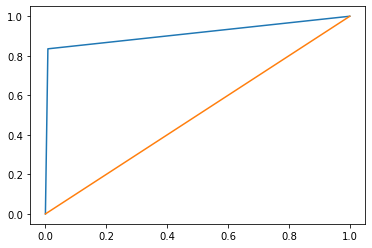

In [33]:
plt.plot(fpr1, tpr1) 
plt.plot(fpr2, tpr2) 
plt.show()

### Now find the roc_auc_score for each. 

In [34]:
# For 5_classifier
from sklearn.metrics import roc_auc_score
roc_auc_score_5_classifier = roc_auc_score(y_true_5_classifier, y_pred_5_classifier)
roc_auc_score_5_classifier

0.9135385341029717

In [35]:
# For never_5_classifier
from sklearn.metrics import roc_auc_score
roc_auc_score_never_5_classifier = roc_auc_score(y_true, y_pred)
roc_auc_score_never_5_classifier

0.5

### What does this metric tell you? Which classifier works better with this metric in mind?

In [36]:
"""The roc_auc_score always runs from 0 to 1 The 5_classifier is having 0.9 which is better when compared with 
never_5_classifier with 0.5"""

'The roc_auc_score always runs from 0 to 1 The 5_classifier is having 0.9 which is better when compared with \nnever_5_classifier with 0.5'